# Prepare new EEG data for training of machine-learning models

In this notebook, the preprocessing for machine learning purposes is done. Also, some exploration and visualization is done to better understand the new data at hand. This is inspired by the previous work of Bjorn Bruns, but applied to a new dataset.

+ Import data.
+ Apply filters (bandpass).
+ Detect potential bad channels and replace them by interpolation.
+ Detect potential bad epochs and remove them.
+ Extract features
+ Select features

## Import packages & links

In [6]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne
import seaborn as sns

from mne_features.feature_extraction import extract_features
import eegyolk
from eegyolk.config import Config
from eegyolk.raw import RawData

from eegyolk.cnt import CntReader

# import sys
# sys.path.insert(0,'../eegyolk')

from eegyolk.raw import RawDataBdf


config = Config()

sns.set_theme(style='whitegrid')
%matplotlib inline

In [7]:
eegyolk.__spec__.origin

'/home/cmoore/.local/lib/python3.8/site-packages/eegyolk/__init__.py'

## before we would
## Search all *.cnt files and get paths, code, and age group

In [8]:
acquired = RawData(config.get_directory('data'), config.get_directory('metadata'))

In [9]:
acquired.raw.head()

,code,cnt_path,cnt_file,age_group,age_days,age_months,age_years
0,35,/volume-ceph/DDP_projectfolder/11mnd mmn/035_1...,035_11_jc_mmn36_slp_mmn25_slp,11,331.0,11.033333,0.919444
1,27,/volume-ceph/DDP_projectfolder/11mnd mmn/027_1...,027_11_jc_mmn25_wk,11,326.0,10.866667,0.905556
2,25,/volume-ceph/DDP_projectfolder/11mnd mmn/025_1...,025_11_mc_mmn36_wk,11,360.0,12.000000,1.000000
3,35,/volume-ceph/DDP_projectfolder/11mnd mmn/035_1...,035_11_jc_mmn36slp_mmn25_slp_2,11,331.0,11.033333,0.919444
4,30,/volume-ceph/DDP_projectfolder/11mnd mmn/030_1...,030_11_jc_mmn36_wk_mmn25_wk,11,328.0,10.933333,0.911111


In [10]:
acquired = RawDataBdf(config.get_directory('data_2022'), config.get_directory('metadata_2022'))

In [11]:
acquired.raw.head()

,ParticipantID,Sex,Group_AccToParents,Age_original_a,Age_days_a,Age_months_a,CDIpresent_a,CDIpresent_b,Age_original_b,Age_days_b,Age_months_b,path_a,path_b,age_group_a,age_group_b
0,101,M,At risk,20;23,623,20.766667,Ja,Ja,23;22,712.0,23.733333333333334,/volume-ceph/ePodium_projectfolder/dataset/101...,/volume-ceph/ePodium_projectfolder/dataset/101...,2,2
1,102,F,Control,20;20,620,20.666667,Ja,Ja,23;17,707.0,23.566666666666666,/volume-ceph/ePodium_projectfolder/dataset/102...,/volume-ceph/ePodium_projectfolder/dataset/102...,2,2
2,103,F,At risk,20;24,624,20.800000,Ja,Ja,24;8,728.0,24.266666666666666,/volume-ceph/ePodium_projectfolder/dataset/103...,/volume-ceph/ePodium_projectfolder/dataset/103...,2,2
3,104,M,At risk,18;12,552,18.400000,Ja,Ja,20;30,630.0,21,/volume-ceph/ePodium_projectfolder/dataset/104...,/volume-ceph/ePodium_projectfolder/dataset/104...,2,2
4,105,F,At risk,17;4,514,17.133333,Ja,Ja,20;11,611.0,20.366666666666667,/volume-ceph/ePodium_projectfolder/dataset/105...,/volume-ceph/ePodium_projectfolder/dataset/105...,1,2


In [2]:
## now let's add some blocks to get the new dataset into the same configuration

In [4]:
ac

'/home/cmoore/eegyolk/demos'

In [ ]:
example = '/volume-ceph/ePodium_projectfolder/dataset/101b.bdf'


In [12]:
# metadata = '/volume-ceph/ePodium_projectfolder/metadata/children.txt'
# m = pd.read_csv(metadata, sep='\t')
# m.head()

## Visualize the age ranges within groups

KeyError: 'age_months'

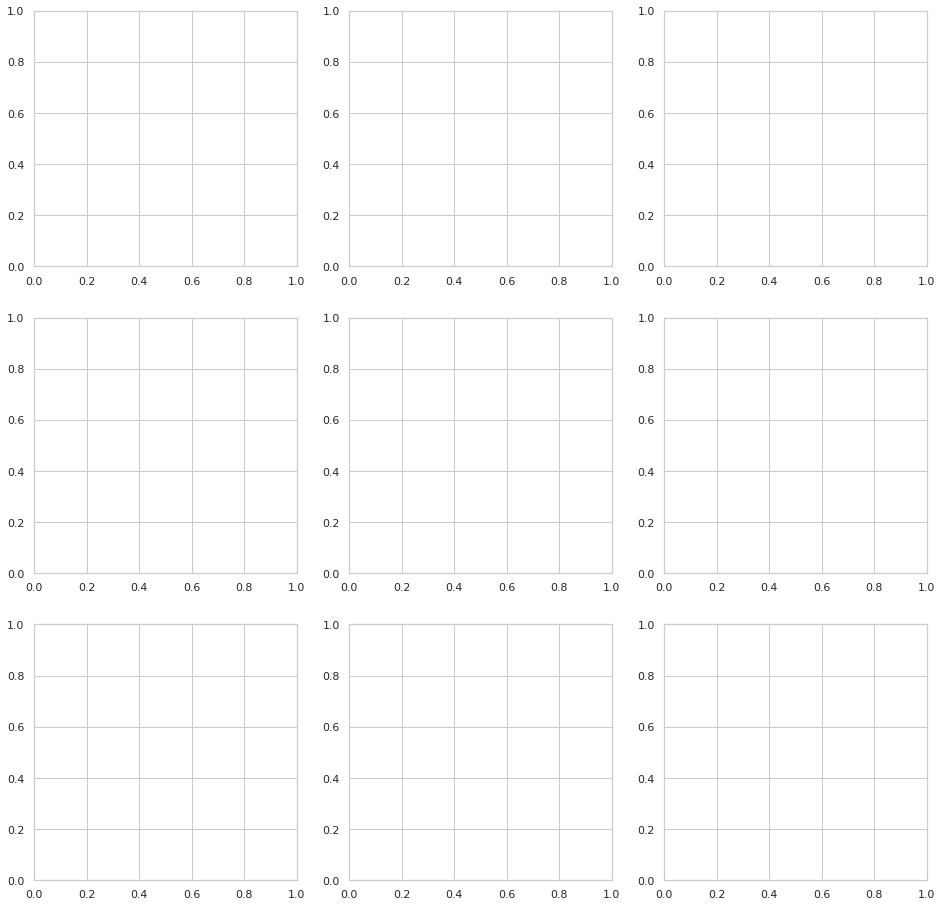

In [13]:
%matplotlib inline

data = acquired.breakdown_by_age()
bins = 20

fig, axes = plt.subplots(3, 3, figsize=(16,16))
for i, ax in enumerate(axes.flat):
    if i + 1 > len(data):
        ax.remove()
    else:
        ax.hist(data[i]['age_months'], bins=bins)
        ax.set_xlabel('Age (months)')
        ax.set_ylabel('Count')
        ax.set_title(f'Frequency histogram, bins={bins}')

In [ ]:
%matplotlib inline

data = acquired.group_by()
bins = 20

fig, axes = plt.subplots(3, 3, figsize=(16,16))
for i, ax in enumerate(axes.flat):
    if i + 1 > len(data):
        ax.remove()
    else:
        ax.hist(data[i]['age_months'], bins=bins)
        ax.set_xlabel('Age (months)')
        ax.set_ylabel('Count')
        ax.set_title(f'Frequency histogram, bins={bins}')

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(16,16))
for i, ax in enumerate(axes.flat):
    if i+1 > len(data):
        ax.remove()
    else:
        sns.swarmplot(ax=ax, x="age_group", y="age_months", data=data[i])
        ax.set_xlabel('Age group')
        ax.set_ylabel('Age (months)')
        ax.set_title('Chronological age vs. age group')

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(16,16))
for i, ax in enumerate(axes.flat):
    if i + 1 > len(data):
        ax.remove()
    else:    
        sns.boxplot(
            ax=ax,
            x="age_group",
            y="age_months",
            data=data[i],
            showmeans=True, 
            meanprops={
                "marker":"o",
                "markerfacecolor":"white", 
                "markeredgecolor":"black",
                "markersize":"6",
                }
        )
        ax.set_xlabel('Age group')
        ax.set_ylabel('Age (months)')
        ax.set_title('Chronological age vs. age group')

## Check files with no label 

In [ ]:
acquired.unlabeled()

### Fill in the missing age data based on the age group the subject is in

We know the age group (i.e. 11, 17, 23, .. months etc) of all the subjects, based on the folder the files are in and based on the file name. We have got the exact ages (in days) of most subjects seperately, which we have added to the DataFrame above. For some of the subjects, we don't have the exact age and therefore we set this equal to the age group.

In [ ]:
acquired.fill_unlabeled()

Below should now return an empty dataframe, because all empty fields have been filled

In [ ]:
acquired.unlabeled()

Some of the CNT files are not usable. They are unusable for multiple reasons. Here are few:

1. Some are missing a header (the header section usually appears to be filled with null bytes).
2. The CNT format itself is ambiguous about whether 4 or 2 bytes are used per event per channel.
   It's also not always possible to guess the correct number of bytes per event.  Some of these
   files will, however, cause problems when trying to read them.
3. CNT files have to have an acquisition date.  MNE authors believe that two formats are possible:
   `%m/%d/%y` and `%d/%m/%y`.  However, the original data contains a third, unrecognized format
   that uses three digits to store the year.  Possibly, it's this one:
   [FAST](https://commons.apache.org/proper/commons-lang/apidocs/org/apache/commons/lang3/time/FastDateFormat.html)
4. I've also encountered other errors, where the reader complained about the number of bytes or
   indexing errors, which I didn't investigate in depth.
   
The fraction of damaged original files is less than 1% of data.

In [ ]:
acquired.filter_broken()

`acquired.filter_broken()` will read the file headers and split the whole data into two groups:

In [ ]:
acquired.raw_good.head()

In [ ]:
acquired.raw_bad

## Explore EEG data

### Import EEG data (from .cnt files)

In [ ]:
# Read a CNT file or a bunch of CNT files using MNE library 
data_raw = acquired.as_mne[500]

## What does the data look like?

In [ ]:
print('Data type: {}\n\n{}\n'.format(type(data_raw), data_raw))

# Get the sample rate
print('Sample rate:', data_raw.info['sfreq'], 'Hz')

# Get the size of the matrix
print('Size of the matrix: {}\n'.format(data_raw.get_data().shape))

# The mne.info class can be used to learn more about the data.
print(data_raw.info)

### Show data as pandas dataframe (i.e. as a table).
The raw data itself is just an array dimensions are no. of channels and timepoint.

In [ ]:
raw_df = data_raw.to_data_frame()
raw_df.head()

In [ ]:
data_raw.info['bads']

In [ ]:
# Band-pass filter (between 1 and 40 Hz. was 0.5 to 30Hz in Stober 2016)
data_raw.filter(1, 40, fir_design='firwin')

### Plot channels

In [ ]:
# Extract data from the first 5 channels, from 1 s to 10 s.
sfreq = data_raw.info['sfreq']
data, times = data_raw[:5, int(sfreq * 1):int(sfreq * 10)]

fig = plt.subplots(figsize=(10,8))
plt.plot(times, data.T)
plt.xlabel('Seconds')
plt.ylabel('$\mu V$')
plt.title('Channels: 1-5')
plt.legend(data_raw.ch_names[:5])

### mne plots
There are many nice plotting options included in mne. They are, however, not always interactive and fully functional in Jupyter notebooks... so better try them out from a python script.

In [ ]:
data_raw.plot(duration=10, block=True)

### Look at events 

In [ ]:
events, event_id = mne.events_from_annotations(data_raw)
print(events[:10, :])
print(event_id)

Check which unique event indentifiers there are

In [ ]:
unique_event_types = set(events[:, 2])
print(unique_event_types)

### Search for most common event

In [ ]:
# this will take forever to run because it needs to read every CNT file in the dataset
# It also doesn't seem to be very useful anyways.

# print(acquired.count_events())

### Display signal around one type of event
Selects signal for specific event ID and plots time window from tmin to tmax.

In [ ]:
# start of each epoch (200ms before the trigger)
tmin = -0.2

# end of each epoch (500ms after the trigger)
tmax = 0.5

# means from the first instant to t = 0
baseline = None, 0

picks = mne.pick_types(data_raw.info, meg=False, eeg=True, stim=False, eog=False, exclude='bads')

print(picks)

In [ ]:
epochs = mne.Epochs(
    data_raw,
    events,
    event_id,
    tmin,
    tmax,
    proj=True,
    picks=picks,
    baseline=baseline,
    preload=True,
    verbose=True,
)
print(epochs)

Export data in tabular structure as a pandas DataFrame.

In [ ]:
epochs_df = epochs.to_data_frame()
epochs_df.head()

In [ ]:
evoked = epochs['55'].average()
evoked.plot()

Spatial plot

In [ ]:
evoked.plot_topomap(times=[0.1], size=3., title="Topo plot", time_unit='s');

### Plot topomaps for different time points

In [ ]:
evoked.plot_topomap(times=np.array([0, 0.016, 0.030, 0.060, 0.070, 0.1, 0.2, 0.5]), time_unit='s')

### Test other event type

In [ ]:
evoked = epochs['2'].average()
evoked.plot()
evoked.plot_topomap(times=[0.1], size=3., title="Topo plot", time_unit='s');

In [ ]:
evoked.plot_topomap(times=np.array([0, 0.016, 0.030, 0.060, 0.070, 0.1, 0.2, 0.5]), time_unit='s')

# Adding a montage to the data

Montages specify the exact electrode placement on the scalp of the subject. This contains coordinates relative to a point on the scalp. Often this data is included in the EEG data (.cnt file). Unfortunately for us, we don't have this information. The electrode placement information can be used to fix broken channels by using the channels surrounding this channel. Even though we don't have the exact locations, we do know the electrode placement system used: 10-20. We can use this to approximate the locations.

### When looking at the maps above, the electrode placement seems to be incorrect

In [ ]:
fig = plt.figure()
ax2d = fig.add_subplot(121)
ax3d = fig.add_subplot(122, projection='3d')
data_raw.plot_sensors(ch_type='eeg', axes=ax2d)
data_raw.plot_sensors(ch_type='eeg', axes=ax3d, kind='3d')
ax3d.view_init(azim=70, elev=15)

In [ ]:
layout_from_raw = mne.channels.make_eeg_layout(data_raw.info)
layout_from_raw.plot()

### Unfortunately, we don't have the exact sensor locations. Therefore, we try to approximate them with a standard montage.

Standard montages come with the mne package. They're based on well known and often used electrode placement systems (10-20 in our case).

In [ ]:
print(data_raw.ch_names)

In [ ]:
len(data_raw.ch_names)

In [ ]:
montage = mne.channels.make_standard_montage('standard_1020')
montage.ch_names = [ch_name.upper() for ch_name in montage.ch_names]

In [ ]:
montage.plot(kind='topomap', show_names=True)

In [ ]:
data_raw_1020 = data_raw.copy().set_montage(montage)

### Now, after setting the 1020 montage, the maps look different

In [ ]:
fig = plt.figure()
ax2d = fig.add_subplot(121)
ax3d = fig.add_subplot(122, projection='3d')
data_raw_1020.plot_sensors(ch_type='eeg', axes=ax2d)
data_raw_1020.plot_sensors(ch_type='eeg', axes=ax3d, kind='3d')
ax3d.view_init(azim=70, elev=15)

In [ ]:
layout_from_raw = mne.channels.make_eeg_layout(data_raw_1020.info)
layout_from_raw.plot()

## Custom cnt-file import function:

In [ ]:
reader = CntReader(acquired)

signals, labels, channel_names = reader.read(
    acquired.raw_good['cnt_path'][30],
    acquired.raw_good['age_months'][0],
)

In [ ]:
signals.shape

In [ ]:
len(labels)

# Feature extraction and save processed data

## Determine how to store the processed data

Below we're determining what the best method is to extract and save the features. At the end, we combine all the parts.

In [ ]:
reader.save_preprocessed(config.get_directory('preprocessed'), limit=10, force=True)

All the stuff below is the explanation of how the original author came up with the function above (can be safely ignored)

## Extract features that can be used for machine learning models

All of the below has been implemented as part of `CntReader.save_preprocessed_row()` and happens automatically during parsing.

### Extract features from the raw data to reduce dimensionality

In [ ]:
def compute_rms(data):
    """Root-mean squared value of the data (per channel).
    Parameters
    ----------
    data : ndarray, shape (n_channels, n_times)
    Returns
    -------
    output : ndarray, shape (n_channels,)
    Notes
    -----
    Alias of the feature function: *rms*
    """
    return np.sqrt(np.mean(np.power(data, 2), axis=-1))

Select features from the raw data for machine learning

In [ ]:
selected_features = {
    'mean',
    ('root_mean_squared', compute_rms),
    'hjorth_mobility',
    'hjorth_complexity',
    'variance',
    'std',
    'kurtosis',
    'skewness',
    'app_entropy',
    'zero_crossings',
    'energy_freq_bands',
    'spect_edge_freq',
    'ptp_amp',
}

x_new = extract_features(signals, 500.0, selected_features, return_as_df=1)

In [ ]:
x_new

The raw data had a shape of (1917, 30, 501) - the extracted features data is almost 30 times smaller (before feature selection):

In [ ]:
x_new.shape

### Search for highly correlated features and remove one of them

Some features are often highly correlated and therefore don't add a lot of additional information to the model. To further reduce dimensionality, one of the two highly correlated features can be removed.

In [ ]:
x_new_1 = x_new.iloc[:, x_new.columns.get_level_values(1) == 'ch1']

### Select only the first channel for all features

In [ ]:
x_new_1

In [ ]:
correlation = x_new_1.corr()

In [ ]:
sns.heatmap(correlation)

In [ ]:
correlation

In [ ]:
correlation.ge(0.9)

Highly correlated (>0.90), channel 0:
- std & rms (0.926)
- std & ptp_amp (0.9688)
- std & variance (0.952)
- ptp_amp & variance (0.900)

Highly correlated (>0.90), channel 1:
- std & rms
- std & ptp_amp
- std & variance
- rms & ptp_amp
- ptp_amp & variance

Highly correlated (>0.90), channel 2:
- std & rms
- std & ptp_amp
- std & variance
- rms & ptp_amp
- ptp_amp & variance

Highly correlated (>0.90), channel 3:
- std & rms
- std & ptp_amp
- std & variance
- ptp_amp & variance

Highly correlated (>0.90), channel 3:
- std & rms
- std & ptp_amp
- std & variance
- ptp_amp & variance

Highly correlated (>0.90), channel 4:
- std & rms
- std & ptp_amp
- std & variance
- ptp_amp & variance

Highly correlated (>0.90), channel 5:
- std & rms
- std & ptp_amp
- std & variance
- rms & ptp_amp
- ptp_amp & variance

After inspecting a few channels and the correlation between the features, the features `std` and `ptp_amp` can be removed, because they have a high correlation with eachother, `rms` and `variance`.  Removing these two features will reduce the dimensionality.

### Feature extraction after selection

Removed features: `std`, `ptp_amp`

In [ ]:
selected_features_selection = {
    'mean', ('root_mean_squared', compute_rms),
    'hjorth_mobility',
    'hjorth_complexity',
    'variance',
    'kurtosis',
    'skewness',
    'app_entropy',
    'zero_crossings',
    'energy_freq_bands',
    'spect_edge_freq',
}

x_new_selection = extract_features(signals, 500.0, selected_features_selection, return_as_df=1)

In [ ]:
x_new_selection.columns

The different channels aren't identifiable by the current naming method. Map the numbers to the actual channel name and flatten the MultiIndex column dataframe.

### Sanity check: test loading the saved file from disk

In [ ]:
df_load = pd.read_hdf(
    os.path.join(
        config.get_directory('preprocessed'),
        'extracted_features_040_11_jc_mmn36_wk_mmn25_wk.h5',
    ),
)

In [ ]:
df_load